In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import keras
from keras import backend as K
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
cfg.gpu_options.per_process_gpu_memory_fraction=0.333
K.set_session(K.tf.Session(config=cfg))

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import os
import numpy as np
import pandas as pd
import pickle as pkl

In [3]:
os.chdir('Z:/project')
X_new = pkl.load( open( "./results/tfidf_4801395_chi2_800.pickle", "rb" ) )
Ym = pkl.load( open( "./results/ym_4801395.pickle", "rb" ) )
Yn = pkl.load( open( "./results/yn_4801395.pickle", "rb" ) )
Ym_one_hot = to_categorical(Ym)
Yn_one_hot = to_categorical(Yn)


In [4]:
X = np.array(X_new)

In [5]:
X_new.shape, len(Ym_one_hot), len(Yn_one_hot)

((1875, 800), 1875, 1875)

In [6]:
train = X_new[:960]
valid = X_new[960:1260]
test = X_new[1260:]

y_train = Yn_one_hot[:960]
y_valid = Yn_one_hot[960:1260]
y_test = Yn_one_hot[1260:]

ym_train = Ym_one_hot[:960]
ym_valid = Ym_one_hot[960:1260]
ym_test = Ym_one_hot[1260:]


In [7]:
y_train.shape

(960, 2)

In [8]:
from keras import models
from keras import layers
network =models.Sequential()
network.add(layers.Dense(800,activation='relu',input_shape=(800,)))
network.add(layers.Dense(128,activation='relu'))
network.add(layers.Dense(2,activation='softmax'))
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
history=network.fit(train, y_train,
                 epochs=50,
                 batch_size=128,
                 validation_data=(valid,y_valid), verbose=0)

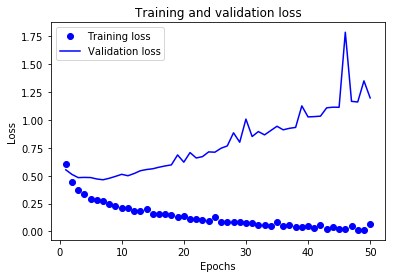

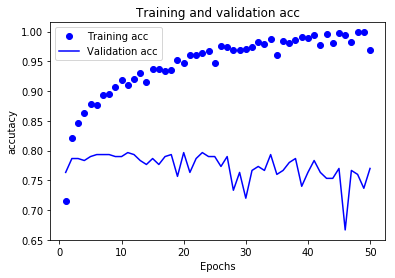

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title("Training and validation acc")
plt.xlabel('Epochs')
plt.ylabel('accutacy')
plt.legend()
plt.show()

In [12]:
history=network.fit(train, y_train,
                 epochs=5,
                 batch_size=128,
                 validation_data=(valid,y_valid), verbose=0)
test_loss,test_acc=network.evaluate(test,y_test)
print('test_acc',test_acc)

615/615 [==============================] - 0s 112us/step
test_acc 0.7609756098530157


In [21]:
y_pred = network.predict(test)
y_pred

array([[9.8829180e-01, 1.1708184e-02],
       [9.9999321e-01, 6.8126551e-06],
       [9.9949396e-01, 5.0604442e-04],
       ...,
       [9.9999666e-01, 3.2867297e-06],
       [1.0211360e-08, 1.0000000e+00],
       [9.9983644e-01, 1.6356807e-04]], dtype=float32)

In [22]:
y_pred = y_pred>=0.5
y_pred=y_pred*1
y_pred

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [40]:
y_pred[:,0]

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [39]:
precision = np.sum(y_pred[:,0] + y_test[:,0] == 2)/np.sum(y_pred[:,0])
recall = np.sum(y_pred[:,0] + y_test[:,0] == 2)/np.sum(y_test[:,0])
f1 = 2*precision*recall/(precision+recall)
print("1")
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)

precision = np.sum(y_pred[:,0] + y_test[:,0] == 0)/(len(y_pred[:,0])-np.sum(y_pred[:,0]))
recall = np.sum(y_pred[:,0] + y_test[:,0] == 0)/(len(y_test[:,0])-np.sum(y_test[:,0]))
f1 = 2*precision*recall/(precision+recall)
print("0")
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)

1
precision:  0.7528868360277137
recall:  0.8907103825136612
F1:  0.8160200250312891
0
precision:  0.7802197802197802
recall:  0.570281124497992
F1:  0.6589327146171694


In [57]:
(0.753+0.78)/2, (0.891+0.57)/2, (0.816+0.659)/2

(0.7665, 0.7304999999999999, 0.7375)

In [113]:
# CNN
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

In [49]:
train = X_new[:960]
valid = X_new[960:1260]
test = X_new[1260:]

y_train = Yn_one_hot[:960]
y_valid = Yn_one_hot[960:1260]
y_test = Yn_one_hot[1260:]

ym_train = Ym_one_hot[:960]
ym_valid = Ym_one_hot[960:1260]
ym_test = Ym_one_hot[1260:]

In [116]:
# model  

from keras import layers
from keras import models
from keras.layers.embeddings import Embedding

note_model = models.Sequential()
note_model.add(Embedding(2000, 100, input_length=800))
#note_model.add(Flatten())
note_model.add(Conv1D(64, 5, activation='relu'))
note_model.add(Dense(1, activation='sigmoid'))
"""note_model.add(layers.Conv1D(50, 8, activation='relu', input_length=800))
note_model.add(layers.Conv1D(40, 4, activation='relu'))
#note_model.add(layers.MaxPooling1D(2,))
#note_model.add(layers.Conv1D(40, 4, activation='relu'))
#note_model.add(layers.MaxPooling1D(2,))
note_model.add(layers.Conv1D(20, 4, activation='relu'))
note_model.add(layers.Flatten())
note_model.add(layers.Dense(8, activation='relu'))        
note_model.add(layers.Dense(2, activation='softmax'))"""

"note_model.add(layers.Conv1D(50, 8, activation='relu', input_length=800))\nnote_model.add(layers.Conv1D(40, 4, activation='relu'))\n#note_model.add(layers.MaxPooling1D(2,))\n#note_model.add(layers.Conv1D(40, 4, activation='relu'))\n#note_model.add(layers.MaxPooling1D(2,))\nnote_model.add(layers.Conv1D(20, 4, activation='relu'))\nnote_model.add(layers.Flatten())\nnote_model.add(layers.Dense(8, activation='relu'))        \nnote_model.add(layers.Dense(2, activation='softmax'))"

In [117]:
note_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [118]:
note_model_train = note_model.fit(x, y, batch_size=32,epochs=7,verbose=1,validation_data=(x, y))

ValueError: Error when checking target: expected dense_24 to have 3 dimensions, but got array with shape (100, 1)

In [28]:

import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import os

#os.chdir('Z:/project')
#train = pd.read_csv("./results/train_231249.csv")
#test = pd.read_csv("./results/test_800595.csv")

x1, y1 = shuffle(X_new, Yn)


In [29]:
x = x1[:300]
y = y1[:300]
x2 = x1[300:400]
y2 = y1[300:400]

In [30]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
# define documents
x
# define class labels
y = array(y)

In [86]:
# integer encode the documents
"""vocab_size = 2000
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)"""

'vocab_size = 2000\nencoded_docs = [one_hot(d, vocab_size) for d in docs]\nprint(encoded_docs)'

In [95]:
# pad documents to a max length of 4 words
"""max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)"""

"max_length = 4\npadded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')\nprint(padded_docs)"

In [36]:
# define the model
model = Sequential()
model.add(Embedding(2000, 100, input_length=800))
#model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 800, 100)          200000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               10240128  
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 10,440,257
Trainable params: 10,440,257
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
# fit the model
model.fit(x, y, epochs=10, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(x2, y2, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 51.000000


In [38]:
y2_pred = model.predict(x2)
y2_pred

array([[0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.47022432],
       [0.470

In [34]:
precision = np.sum(y2_pred + y2 == 2)/np.sum(y2_pred)
recall = np.sum(y2_pred + y2 == 2)/np.sum(y2)
f1 = 2*precision*recall/(precision+recall)
print("1")
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)

precision = np.sum(y2_pred + y2 == 0)/(len(y2_pred)-np.sum(y2_pred))
recall = np.sum(y2_pred + y2 == 0)/(len(y2)-np.sum(y2))
f1 = 2*precision*recall/(precision+recall)
print("0")
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)

1
precision:  0.0
recall:  0.0
F1:  nan
0
precision:  0.0
recall:  0.0
F1:  nan


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


In [56]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(np.array([[0.1, 0.2], [0.2, 0.6]]).reshape(4,))
le.transform([0.1, 0.2, 0.2, 0.6]) 

array([0, 1, 1, 2], dtype=int64)